<font size="5">**Исследование компьтерных игр**</font>

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Импорт библиотек и описание данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


***Вывод:*** В датасете есть пропуски. При предобработке данных нужно будет решить стоит ли их заполнять. Также необходимо изменить тип данных в некоторых столбцах. Больше всего смущает тип столбца User_Score. Также в предобработке следует разобратья почему данный столбец имеет такой тип и как перевести его в числовой вариант. 

## Предобработка данных

### Преведение к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


***Вывод:*** Теперь будет легче обращаться к столбцам.

### Изменение типов данных

В первую очередь нужно привести год к написанию целыми числами.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

"tbd"(to be determined) в столбце User_score означает, что значение подлежит определению. Возможно, что оценок пользователей слишком мало, чтобы выявить среднюю оценку. Или не прошло нужное количество времени для определения. Считаю, что можно заменить данные значения на NaN и потом привести столбец к типу float.

In [8]:
data['user_score']=data['user_score'].replace('tbd',np.nan)

In [9]:
data['user_score'] = data['user_score'].astype('float64')

***Вывод:*** Все необходимые для исследования столбцы приведены к нужным типам. 

### Обработка пропусков

In [10]:
display(data.loc[data['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
print('Процент пропущенных значений:', (data['name'].isnull().sum() / len(data)*100).round(2))

Процент пропущенных значений: 0.01


Пропусков в столбце name всего 2 и данные скорее всего не входят в актуальный период. Моожно обойтись без этих данных.

In [12]:
data = data.dropna(subset = ['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


При решении вопроса о заполнении пропусков в столбце year_of_release посмотрим на процент пропущенных значений. 

In [13]:
print('Процент пропущенных значений:', (data['year_of_release'].isnull().sum() / len(data)*100).round(2))

Процент пропущенных значений: 1.61


Так как процент пропусков около 2%, то можем также удалить эти строки.

In [14]:
data = data.dropna(subset = ['year_of_release'])

***Вывод:*** При обработке пропусков были удалены данные, которые составляют менее 10%. Значения в столбцах critic_score и user_score считаю не нужно заполнять, так как это может повлиять на выводы исследования. Значения в столбце рейтинг заполняются на основании решения специальной организации. Считаю, что мы не имеем права их заполнять как нам хочется. Поэтому в данном столбце считаю также нужно оставить пропуски незаполненными.

### Добавление столбцов

Необходимо добавить столбец в суммой продаж во всем мире. Для этого сложим значения продаж в Северной Америке, Европе, Японии и других странах.

In [15]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']+ data['other_sales']

In [16]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

В ходе предобработки данных были заменены типы написания столбцов, типпы данных в столбцах, где это необходимо. Также были удалены около 2% данных. Остальные пропуски остались нетронутыми, так как нет данных для их заполнения и заполнение их медианной, модой или 0 может привести к искажению результатов анализа.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

Для начала необходимо посмотреть, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

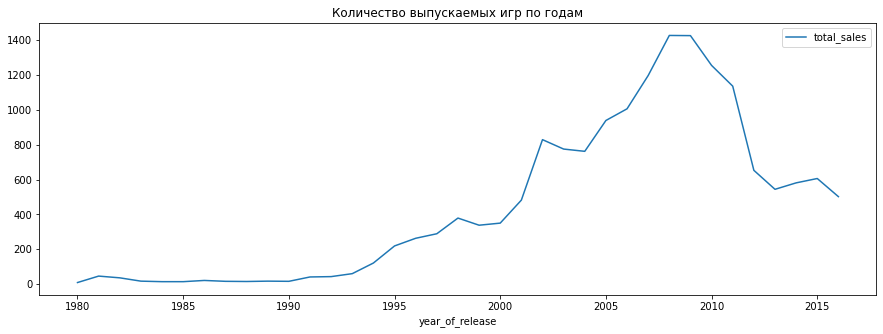

In [17]:
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(figsize=(15, 5),title = 'Количество выпускаемых игр по годам')
plt.show()

***Вывод:*** Можно сказать, что зависимость от года есть,но не сильная. Конечно, меньше всего игр выпускалось в 1980-е, когда эта сфера только начала развиваться. С развитием сферы выпускалось все больше игр. Пик выпуска пришелся на 2008 год. Но актуальный период по этим данным не определить, так как платформы, которые выпускали в 2008 скорее всего сейчас не актуальны и не выпускают игры. 

### Как менялись продажи по платформам

Для начала создадим сводную с топ-10 платформ по продажам

In [18]:
top10 = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False).head(10).reset_index()


Теперь сформируем словарь из названий платформ

In [19]:
top10_dict = top10['platform'].unique()

Посмотрим распределение продаж игр на топ-10 платформах по годам

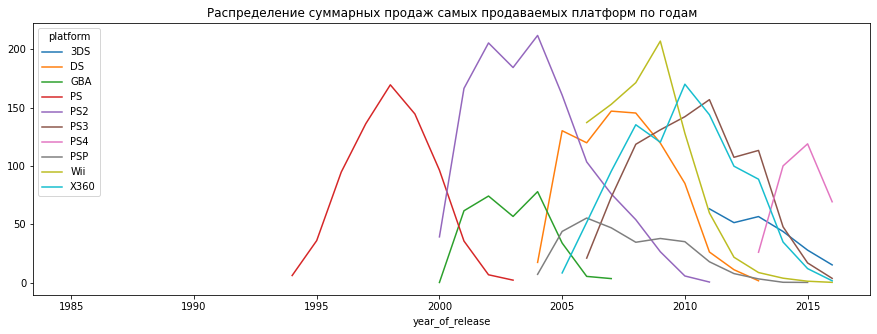

In [20]:
data.query('platform in @top10_dict').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5),title = 'Распределение суммарных продаж самых продаваемых платформ по годам')
plt.show()

***Вывод:*** Можно сделать вывод, что жизненный цикл платформ составляет от 10 до 15 лет. Но на основании этих данных тоже невозможно определить актуальный период, Так как всего 4 платформы из 10 выпустили игры в 2016 году. PS приостановил выпуск еще в начале 2000-х. Можно сделать вывод, что сумма продаж по играм не является фактором их актуальности. 

### Определение актуального периода

Для начала отсортируем платформы, на которых выпустились игры в 2016 году.  

In [21]:
actual_platform = data.loc[data['year_of_release']==2016]

Создадим словарь с названиями платформ

In [22]:
actual_platform_dict = actual_platform['platform'].unique()

Посмотрим распределение продаж игр на этих платформах по годам. 

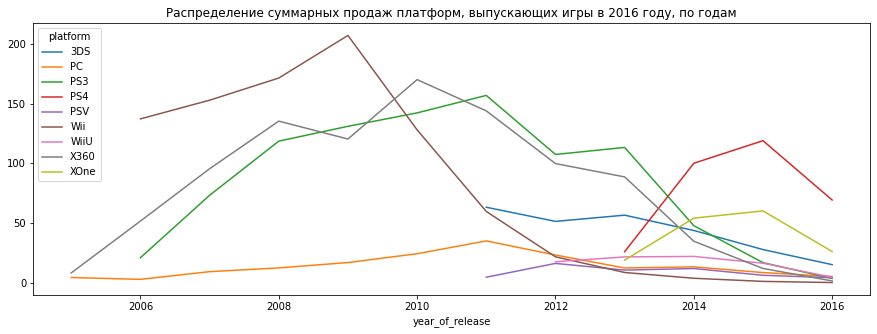

In [23]:
actual_platform_sales = data.query('platform in @actual_platform_dict and year_of_release>=2005').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(figsize=(15, 5),title = 'Распределение суммарных продаж платформ, выпускающих игры в 2016 году, по годам')
plt.show()

***Вывод:*** Сначала хотела взять актуальным период с 2006 года, но потом передумала, потому что те платформы, которые обрели популярность в 2000-х к 2016 приблизились к нулевому показателю. Игры выпускаются, но они уже не ак актуальны в наше время. Поэтому решила брать период с 2011 года когда появляются игры 3DS, которая очень популярна в Японии. 

### Определение потенциально прибыльных платформ

Далее необходимо определить какие платформы лидируют по продажам, растут или падают. Потом на основании анализа выбрать несколько потенциально прибыльных платформ.

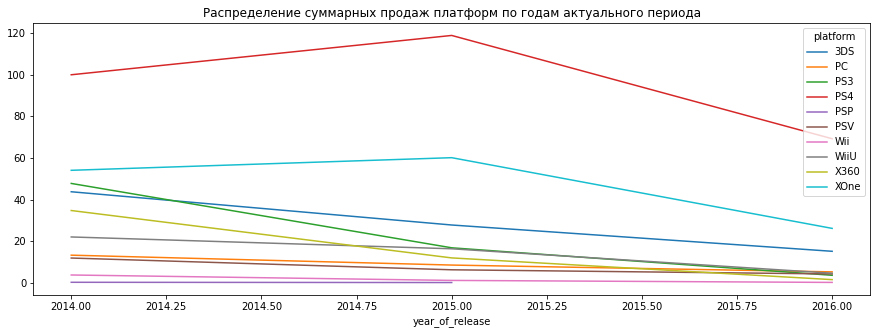

In [24]:
actual_data = data.query('year_of_release >= 2014')
actual_data_pivot = actual_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
actual_data_pivot.plot(figsize=(15, 5),title = 'Распределение суммарных продаж платформ по годам актуального периода')
plt.show()

In [25]:
display(actual_data_pivot)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


***Вывод:*** Так как данные за 2016 год неполные, решила смотреть по 2015 году. Исходя из сводной и  графика наиболее прибыльными платформами являются: PS4, XOne, 3DS.

### Ящик с усами по глобальным продажам

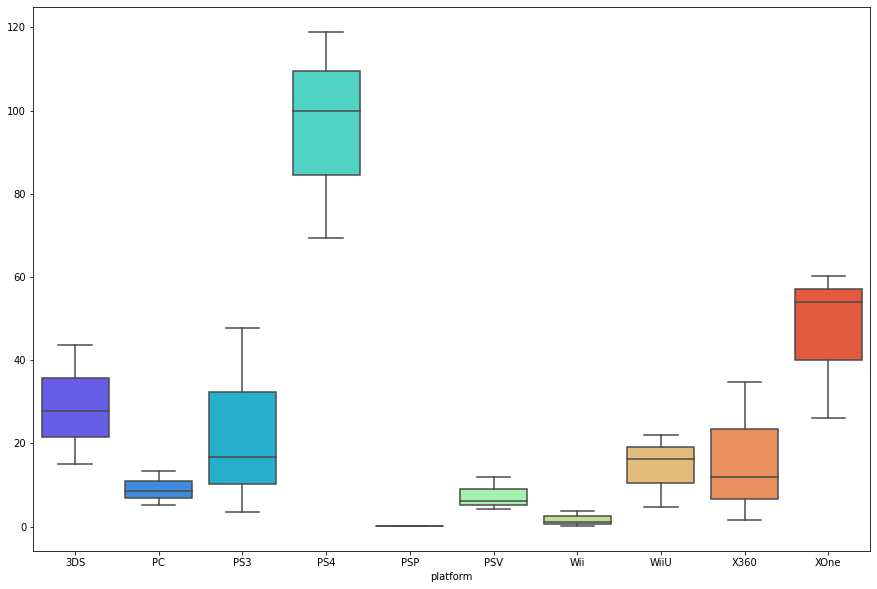

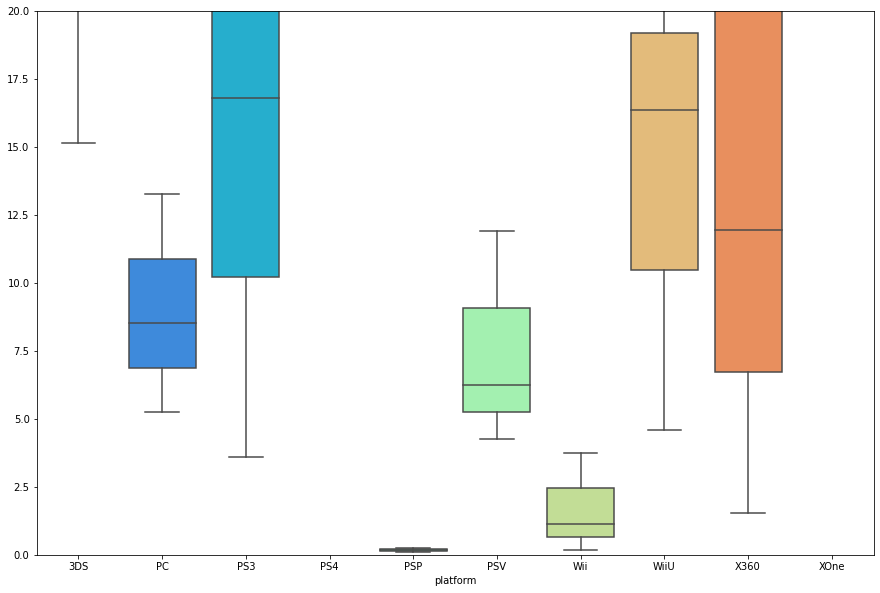

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data=actual_data_pivot, palette='rainbow', showfliers=False)
plt.show()

plt.figure(figsize=(15,10))
plt.ylim(0,20)
sns.boxplot(data=actual_data_pivot, palette='rainbow', showfliers=False)
plt.show()

***Вывод:*** Самый большой разброс и самые большие показатели у PS4. У Xone медиана близится к 75% квантилю. Показатели PSP практически равны нулю. По графику также наиболее привлекательными выглядят PS4,Xone и 3DS.  

### Влияние оценок на продажи внутри одной платформы

Для проверки вляиния оценок на продажи внутри одной платформы возьмем PS4

In [27]:
actual_data.query('platform == "PS4"')[['total_sales', 'user_score', 'critic_score']].corr().head(1)

,total_sales,user_score,critic_score
total_sales,1.0,-0.040132,0.402661


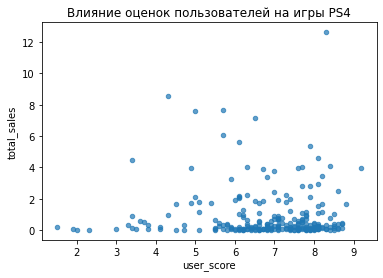

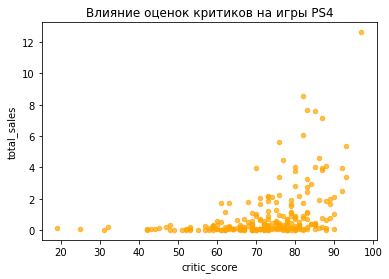

In [28]:
actual_data.query('platform == "PS4"')[['total_sales', 'user_score']].plot(kind = 'scatter', x = 'user_score', y = 'total_sales', alpha = 0.7, title = 'Влияние оценок пользователей на игры PS4')
actual_data.query('platform == "PS4"')[['total_sales', 'critic_score']].plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', color = 'orange', alpha = 0.7, title = 'Влияние оценок критиков на игры PS4')
plt.show()

***Вывод:*** От оценок пользователей продажи практически не влияют. А вот оценки критиков имеют вляние: чем выше оценка, тем больше продажи. 

### Сравнение влияния оценок на продажи внутри других платформ

In [29]:
actual_data.query('platform == "3DS"')[['total_sales', 'user_score', 'critic_score']].corr().head(1)


,total_sales,user_score,critic_score
total_sales,1.0,0.215193,0.314117


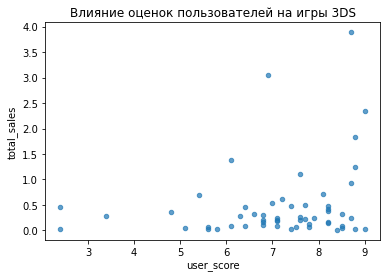

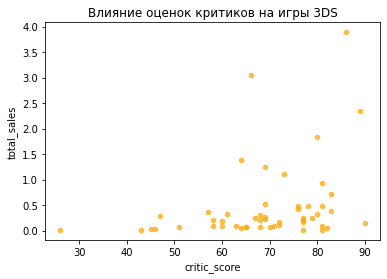

In [30]:
actual_data.query('platform == "3DS"')[['total_sales', 'user_score']].plot(kind = 'scatter', x = 'user_score', y = 'total_sales', alpha = 0.7, title = 'Влияние оценок пользователей на игры 3DS')
actual_data.query('platform == "3DS"')[['total_sales', 'critic_score']].plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', color = 'orange', alpha = 0.7, title = 'Влияние оценок критиков на игры 3DS')
plt.show()

На 3DS ситуация изменилась. Оценки пользователей и критиков почти вравней степени влияют на количество продаж.

In [31]:
actual_data.query('platform == "XOne"')[['total_sales', 'user_score', 'critic_score']].corr().head(1)

,total_sales,user_score,critic_score
total_sales,1.0,-0.070384,0.428677


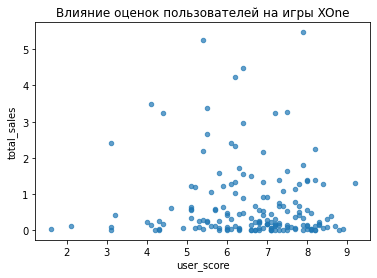

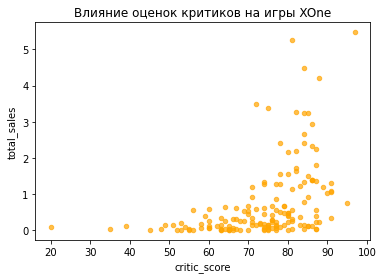

In [32]:
actual_data.query('platform == "XOne"')[['total_sales', 'user_score']].plot(kind = 'scatter', x = 'user_score', y = 'total_sales', alpha = 0.7, title = 'Влияние оценок пользователей на игры XOne')
actual_data.query('platform == "XOne"')[['total_sales', 'critic_score']].plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', color = 'orange', alpha = 0.7, title = 'Влияние оценок критиков на игры XOne')
plt.show()

На XOne ситуация идентичная PS4.

***Вывод:*** Оценка критиков влияет на количество продаж во всех трёх рассмотренных случаях. Оценка пользователей не так сильно влияет или не влияет вовсе. Думаю это объясняется тем, что критики это обычно люди имеющие атворитет в этой сфере. Люди, которые могут сравнивать разные жанры игр. Пользователи зачастую отонсятся к определенным жанрам субъективно и не могут служить показаетелм того, что игра хорошая. Возможно пользователб просто не любит такой жанр. 

### Общее распределение игр по жанрам

Для начала посчитаем общее количество продаж игр по жанрам.

In [33]:
genre_actual_sum = actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')


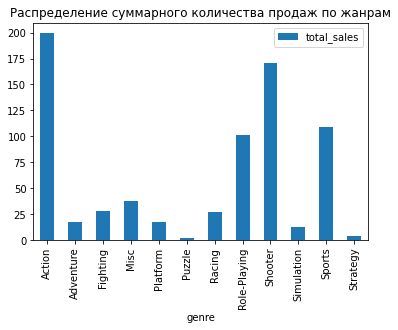

In [34]:
genre_actual_sum.plot(kind='bar', title = 'Распределение суммарного количества продаж по жанрам')
plt.show()

Жанр Action явно лидирует, но точно ли это обусловлено большим спросом или в этом жанре просто выпускается больше игр. Нам поможет разобраться медианна. 
Меньше всего продаж у жанра Puzzle

In [35]:
genre_actual_count = actual_data.pivot_table(index = 'genre',values = 'total_sales', aggfunc = 'median')

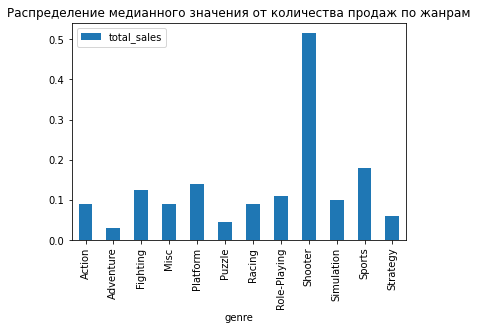

In [36]:
genre_actual_count.plot(kind='bar', title = 'Распределение медианного значения от количества продаж по жанрам')
plt.show()

Тут все обстоит по-другому. По медианному значению лидирует жанр Shooter. Лидер по продажам жанр Action где-то посередине. Возможно, что в жанре Action просто чаще выпускаются игры, поэтому этот жанр лидирует по числу продаж. 
В данном случае меньше всего продаж у жанра Adventure,но показатели аутсайдера - жанра Puzzle тоже не сильно повысились.

### Вывод

В ходе исследовательского анализа было выявлено, что в среднем платформы актуальны 10-15 лет. При анализе важно учитывать данные не за все периоды, а только за актуальные. В данном исследовании актуальным я посчитала срок 3 года с 2014 по 2016 год. На 2016 год потенциально прибыльными для всего мира считаются PS4 и XOne. Можно еще добавить к прибыльным 3DS, так как думаю при составлении портрета пользователя в Японии эта платформа будет показывать большие показатели. Отзывы пользователей почти не влияют на продажи игр, а вот отзывы критиков влияют. Самым популярным во всем мире является жанр shooter,хоть по сумме продаж лидировал жанр Action. 

## Портрет пользователя

### Портрет пользователя в странах Северной Америки

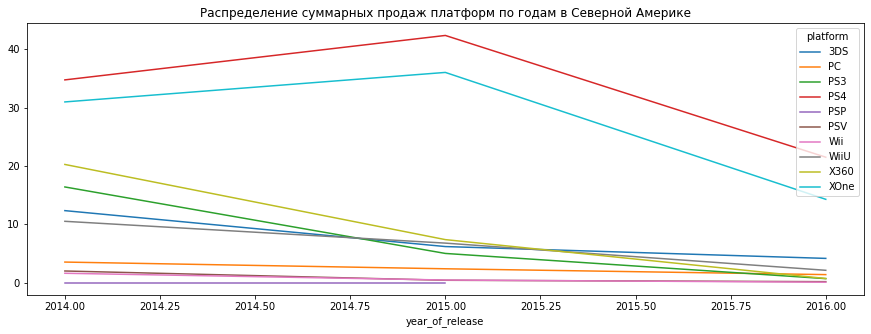

In [37]:
actual_na_sales = actual_data.pivot_table(index='year_of_release', columns = 'platform', values='na_sales', aggfunc='sum')
actual_na_sales.plot(figsize=(15, 5),title = 'Распределение суммарных продаж платформ по годам в Северной Америке')
plt.show()

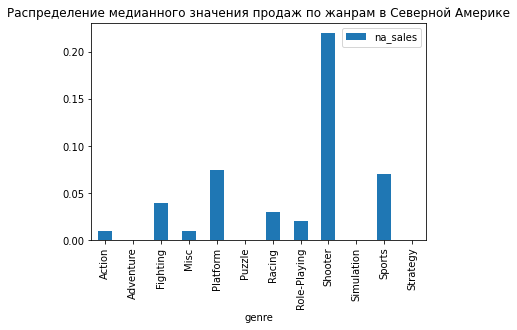

In [38]:
genre_na = actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'median', )
genre_na.plot(kind='bar', title = 'Распределение медианного значения продаж по жанрам в Северной Америке')
plt.show()

***Вывод:*** В Северной Америке актуальными и популярными платформами являются PS4 и XOne. Самым популярным жанром является Shooter.

### Портрет пользователя в странах Европы

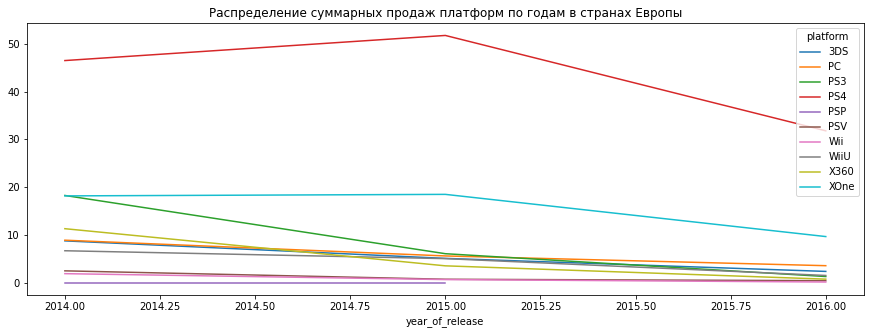

In [39]:
actual_eu_sales = actual_data.pivot_table(index='year_of_release', columns = 'platform', values='eu_sales', aggfunc='sum')
actual_eu_sales.plot(figsize=(15, 5),title = 'Распределение суммарных продаж платформ по годам в странах Европы')
plt.show()

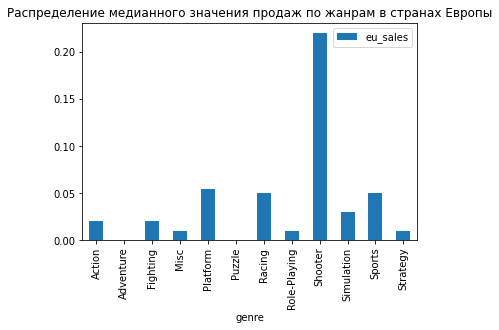

In [40]:
genre_eu = actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'median')
genre_eu.plot(kind='bar', title = 'Распределение медианного значения продаж по жанрам в странах Европы')
plt.show()

***Вывод:*** В Европе PS4 более популярен, чем XOne. Жанр Shooter также является самым популярным.

### Портрет пользователя в Японии

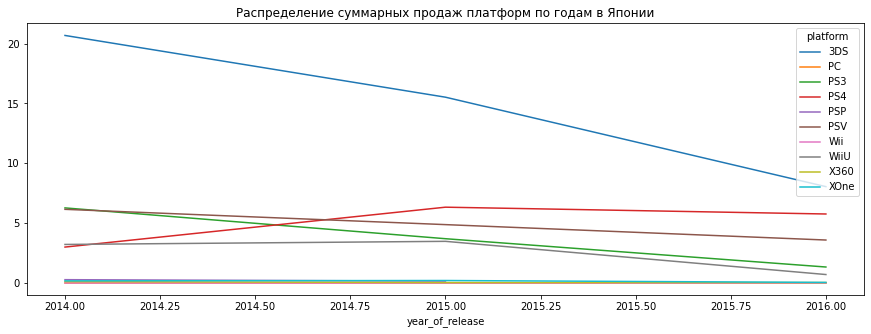

In [41]:
actual_jp_sales = actual_data.pivot_table(index='year_of_release', columns = 'platform', values='jp_sales', aggfunc='sum')
actual_jp_sales.plot(figsize=(15, 5),title = 'Распределение суммарных продаж платформ по годам в Японии')
plt.show()

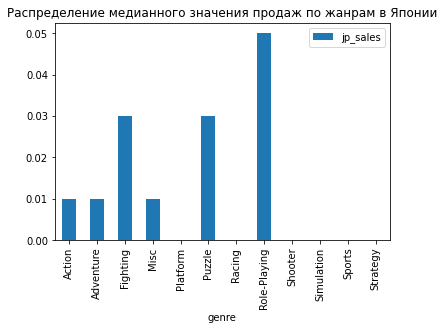

In [42]:
genre_jp = actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'median')
genre_jp.plot(kind='bar', title = 'Распределение медианного значения продаж по жанрам в Японии')
plt.show()

В Японии всегда интересно смотреть показатели, потому что они отличаются от показателей в остальном мире. Самая популярная платформа в Японии это 3DS, а самый популярный жанр это Role-Playing.

### Портрет пользователя в других странах

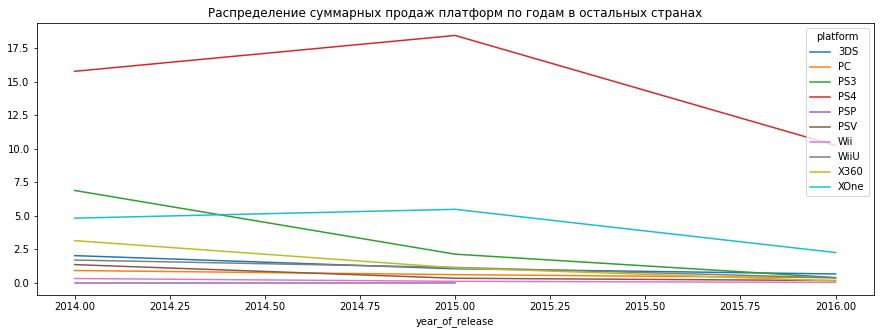

In [43]:
actual_other_sales = actual_data.pivot_table(index='year_of_release', columns = 'platform', values='other_sales', aggfunc='sum')
actual_other_sales.plot(figsize=(15, 5),title = 'Распределение суммарных продаж платформ по годам в остальных странах')
plt.show()

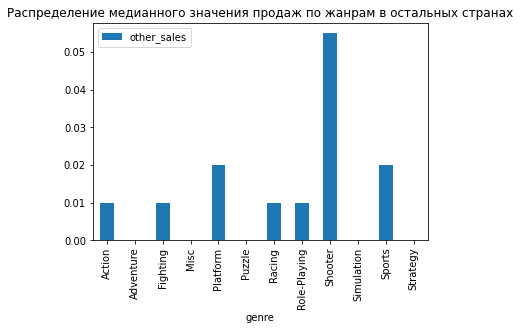

In [44]:
genre_other = actual_data.pivot_table(index = 'genre', values = 'other_sales', aggfunc = 'median')
genre_other.plot(kind='bar', title = 'Распределение медианного значения продаж по жанрам в остальных странах')
plt.show()

В остальных странах картина такая же как и в Европе. Чаще всего пользователи играют Shooter игры на PS4.

### Изучение влияния рейтинга ESRB на продажи в отдельном регионе

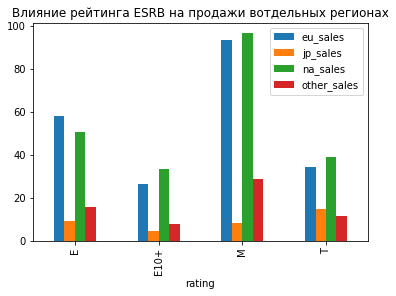

In [45]:
actual_data.pivot_table(index = 'rating',values = ['na_sales','eu_sales','jp_sales','other_sales'], aggfunc = 'sum').plot(kind='bar', title = 'Влияние рейтинга ESRB на продажи вотдельных регионах')
plt.show()

***Вывод:*** В странах Северной Америки, Европе и других странах чаще всего покупают игры с рейтингом от 17 лет. В Японии показатели отличаются. Можно сказать, что практически игры со всеми рейтингами покупаются на одном уровне, но небольшое преимущество у рейтингра игр "для подростков". 

### Вывод

Пользователи во всем мире почти не отличаются от своих предпочтений. Покупают шутеры на PS4 и XOne. В Европе только чаще играют в PS4.  А вот Япония как-будто живет в другом мире, потому что в Японии самой популярной платформой является 3DS, а жанр - Role-playing. Этим же и отличается влияние рейтинга. Думаю все шуттеры имеют рейтинг от 17 лет, поэтому во всем мире чаще покупают игры с этим рейтингом. Role-playing. же редко бывает 17+ и обычно подходит каждому, поэтому в Японии показатели по рейтингу 17+ небольшие. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC 

Гипотеза 0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза 1 = Средние пользовательсткие рейтинги платформ Xbox One и PC  различаются

In [46]:
alpha = 0.05

data_test = data.query('user_score > 0') #чтобы не учитывались пропущенные значения в столбце

xbox = data_test.query('platform == "XOne"') #сделаем выборку по одной из платформ
x_max = xbox['year_of_release'].max() #важно проанализировать данные за один год, возьмем например 2016. 
pc = data_test.query('"PC" in platform').query('year_of_release >= @x_max') #теперь сделаем выборку по другой платформе


results = st.ttest_ind(pc['user_score'],xbox['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')


p-значение: 0.3578752178840483
Не получилось отвергнуть нулевую гипотезу


По результатам проверки гипотезы установлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports

Гипотеза 0 = Средние пользовательские рейтинги жанра Action совпадают с рейтингами жанра Sports 

Гипотеза 1 = Средние пользовательские рейтинги жанров Action и Sports разные.

In [47]:
action = data_test.query('genre == "Action"')
sports = data_test.query('genre == "Sports"')

alpha = 0.05

results = st.ttest_ind(action['user_score'],sports['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    


p-значение: 0.06480928064420527
Отвергаем нулевую гипотезу


По результатам проверки гипотезы можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

По результатам проверки гипотез можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

В ходе исследования было выполнено:

- Удалено около 2% данных
- Принято решение не заполнять оставшиеся пропуски для предотвращения искажения результатов анализа
- Проведен исследовательский анализ данных в ходе которого:
    - установлена длительностть жизненного цикла платформ (10-15 лет)
    - определен актуальный период для анализа (с 2014 года)
    - определены потенциально прибыльные платформы (PS4, Xbox One и 3DS)
    - 3DS представляется наиболее стабильной платформой
    - изучено влияние оценок на количество продаж (оценки пользователей мало влияют на количество продаж, а оценки критиков влияют в большей степени. Чем оценка критика выше, тем чаще покупают игру.
- Составлены портреты пользователей в разных частях мира. В основном весь мир играет в одинаковые жанры на одинаковых платформах. Япония выделяется от всех как популярной платформой так и популярным жанром. 
- Изучено влияние рейтинга на количество продаж. Выявлено, что рейтинг не является фактором, влияющим на количество продаж. 
- Проверены две гипотезы:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые (подтвердилась)
    - средние пользовательские рейтинги жанров Action и Sports разные (подтвердилась).

Ркомендации к планированию:

- акцентировать внимание на шутерах на PS4 и Xbox One, а также для Японии на РПГ на 3DS.
- также можно уделить внимание на PS4 и Xbox One платформерам, гонкам и игры о спорте. На 3DS можно также обратить внимание на файтинги и приключенческие игры.
- в ходе исследования абсолютно доказано, что для Японии нужно выпускать отдельные игры. Или выпускать для всех стран, кроме Японии. Думаю в Японии в основном играют в локально разработанные игры. 
    
